In [1]:
# Importing relevant packages to carry out data analysis and create visulisations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta


In [2]:
### General functions ###

# List of genders as it is used in for loops for the rest of the analysis 
genders = ['Men', 'Women']

# Function to export dataframe as table in markdown format to be able copy into blog in HackMD
def export_df_as_markdown(dataframe, name):
    markdown_table = dataframe.to_markdown(index=False)
    # Adds the exported table to the figures folder in the main directory of the project
    with open(f'figures/{name}_markdown_table.txt', 'w', encoding='utf-8') as file:
        file.write(markdown_table)

In [3]:
# Read the Combined Data CSV file and create the master dataframe
try:
    df = pd.read_csv('olympic_marathon_combined_data.csv')

# Error handling for if the file isn't found or other errors and prints to screen the error
except FileNotFoundError:
    print("Error: File not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Convert 'Year' and 'Position' columns to integer values
df['Year'] = df['Year'].astype(int)
df['Position'] = df['Position'].astype(int)

# Displaying the 54 year marathon, and exporting table of line of data related to the 54 year marathon
fifty_four_year_marathon = df[(df['Name'] == 'Shizo Kanakuri') & (df['Year'] == 1912)]
fifty_four_year_marathon_exp = fifty_four_year_marathon[['Year', 'Location', 'Gender', 'Name', 'Nationality', 'Time_Taken']]
print('54 Year Marathon')
display(fifty_four_year_marathon_exp)
export_df_as_markdown(fifty_four_year_marathon_exp, '54_year_marathon')

# Removing 54 year marathon from dataframe as it is a large anomaly in the data that could skew analysis
df = df.drop(fifty_four_year_marathon.index[0]).reset_index(drop=True)

# Adding OR (Olympic Record) for first Women Marathon finisher
first_women_finisher_index = df[(df['Year'] == 1984) & (df['Gender'] == 'Women') & (df['Position'] == 1)].index[0]
df.loc[first_women_finisher_index, 'Notes'] = 'OR'
print('First women finisher')
display(df.loc[first_women_finisher_index])

# Removing notes other than World Record (WR) and Olympic Record (OR) and replacing with '-'
for row in range(len(df)):
    if df.loc[row, 'Notes'] not in ['WR', 'OR']:
        df.loc[row, 'Notes'] = '-'

54 Year Marathon


,Year,Location,Gender,Name,Nationality,Time_Taken
71,1912,Stockholm,Men,Shizo Kanakuri,Japan,54:08:06:05:32:20.3


First women finisher


Year                    1984
Location         Los Angeles
Gender                 Women
Position                   1
Name             Joan Benoit
Nationality    United States
Continent      North America
Time_Taken           2:24:52
Notes                     OR
Name: 1633, dtype: object

In [4]:
### Time Delta functions to be used

# Function to convert the time string into a time delta format
def time_str_to_time_delta(time_str):
    # Splitting the string into 3 parts by their separation by a colon
    parts = time_str.split(':')
    # Assigning the first part to the hours
    hours = int(parts[0])
    # Assigning the second part to the minutes
    minutes = int(parts[1])
    # Setting microseconds to zero for if there is no microseconds in the string
    microseconds = 0
    if '.' in parts[2]:
        seconds, tenths = map(int, parts[2].split('.'))
        microseconds = tenths * 100000
    else:
        seconds = int(parts[2])
    return timedelta(hours=hours, minutes=minutes, seconds=seconds, microseconds=microseconds)

def time_difference_to_words(difference):
    minutes = difference.seconds // 60
    seconds = difference.seconds % 60
    hundredths = difference.microseconds // 10000
    return f'{minutes} minutes, {seconds} seconds, {hundredths} hundredths of second'

In [5]:
# Updating master dataframe to have a column of the finishing times in a Time Delta format
df['Time'] = df['Time_Taken'].apply(time_str_to_time_delta)

### Reused Dataframes ###
# Creating a few dataframes which will get used a few times in the project

# Dataframe of winners of each race
winners_df = df[df['Position'] == 1].reset_index(drop=True)
print('Winners Dataframe')
display(winners_df)

# Dataframe showing times where a World or Olympic Record has been broken
records_df = df[df['Notes'].isin(['WR', 'OR'])].reset_index(drop=True)
print('Records Dataframe')
display(records_df)

Winners Dataframe


,Year,Location,Gender,Position,Name,Nationality,Continent,Time_Taken,Notes,Time
0,1896,Athens,Men,1,Spyridon Louis,Greece,Europe,2:58:50,OR,0 days 02:58:50
1,1900,Paris,Men,1,Michel Théato,France,Europe,2:59:45,-,0 days 02:59:45
2,1904,St. Louis,Men,1,Thomas Hicks,United States,North America,3:28:53,-,0 days 03:28:53
3,1908,London,Men,1,Johnny Hayes,United States,North America,2:55:18.4,WR,0 days 02:55:18.400000
4,1912,Stockholm,Men,1,Ken McArthur,South Africa,Africa,2:36:54.8,OR,0 days 02:36:54.800000
5,1920,Antwerp,Men,1,Hannes Kolehmainen,Finland,Europe,2:32:35.8,WR,0 days 02:32:35.800000
6,1924,Paris,Men,1,Albin Stenroos,Finland,Europe,2:41:22.6,-,0 days 02:41:22.600000
7,1928,Amsterdam,Men,1,Boughera El Ouafi,France,Europe,2:32:57,-,0 days 02:32:57
8,1932,Los Angeles,Men,1,Juan Carlos Zabala,Argentina,South America,2:31:36,OR,0 days 02:31:36
9,1936,Berlin,Men,1,Kitei Son,Japan,Asia,2:29:19.2,OR,0 days 02:29:19.200000


Records Dataframe


,Year,Location,Gender,Position,Name,Nationality,Continent,Time_Taken,Notes,Time
0,1896,Athens,Men,1,Spyridon Louis,Greece,Europe,2:58:50,OR,0 days 02:58:50
1,1908,London,Men,1,Johnny Hayes,United States,North America,2:55:18.4,WR,0 days 02:55:18.400000
2,1912,Stockholm,Men,1,Ken McArthur,South Africa,Africa,2:36:54.8,OR,0 days 02:36:54.800000
3,1920,Antwerp,Men,1,Hannes Kolehmainen,Finland,Europe,2:32:35.8,WR,0 days 02:32:35.800000
4,1932,Los Angeles,Men,1,Juan Carlos Zabala,Argentina,South America,2:31:36,OR,0 days 02:31:36
5,1936,Berlin,Men,1,Kitei Son,Japan,Asia,2:29:19.2,OR,0 days 02:29:19.200000
6,1952,Helsinki,Men,1,Emil Zátopek,Czechoslovakia,Europe,2:23:03.2,OR,0 days 02:23:03.200000
7,1960,Rome,Men,1,Abebe Bikila,Ethiopia,Africa,2:15:16.2,WR,0 days 02:15:16.200000
8,1964,Tokyo,Men,1,Abebe Bikila,Ethiopia,Africa,2:12:11.2,WR,0 days 02:12:11.200000
9,1976,Montreal,Men,1,Waldemar Cierpinski,East Germany,Europe,2:09:55,OR,0 days 02:09:55


In [6]:
# Producing table of winners and records for both genders

# Looping through the gender to create tables
for gender in genders:
    
    # Creating, displaying and exporting winners tables by gender
    gender_winners_df = winners_df[winners_df['Gender']==gender][['Year', 'Location', 'Gender', 'Name', 'Nationality', 'Time_Taken', 'Notes']]
    print(f'{gender} Winners')
    display(gender_winners_df)
    export_df_as_markdown(gender_winners_df, f'winners_{gender.lower()}')

    # Creating, displaying and exporting records tables by gender
    gender_records_df = records_df[records_df['Gender']==gender][['Year', 'Location', 'Gender', 'Name', 'Nationality', 'Time_Taken', 'Notes']]
    print(f'{gender} Records')
    display(gender_records_df)
    export_df_as_markdown(gender_records_df, f'records_{gender.lower()}')  

Men Winners


,Year,Location,Gender,Name,Nationality,Time_Taken,Notes
0,1896,Athens,Men,Spyridon Louis,Greece,2:58:50,OR
1,1900,Paris,Men,Michel Théato,France,2:59:45,-
2,1904,St. Louis,Men,Thomas Hicks,United States,3:28:53,-
3,1908,London,Men,Johnny Hayes,United States,2:55:18.4,WR
4,1912,Stockholm,Men,Ken McArthur,South Africa,2:36:54.8,OR
5,1920,Antwerp,Men,Hannes Kolehmainen,Finland,2:32:35.8,WR
6,1924,Paris,Men,Albin Stenroos,Finland,2:41:22.6,-
7,1928,Amsterdam,Men,Boughera El Ouafi,France,2:32:57,-
8,1932,Los Angeles,Men,Juan Carlos Zabala,Argentina,2:31:36,OR
9,1936,Berlin,Men,Kitei Son,Japan,2:29:19.2,OR


Men Records


,Year,Location,Gender,Name,Nationality,Time_Taken,Notes
0,1896,Athens,Men,Spyridon Louis,Greece,2:58:50,OR
1,1908,London,Men,Johnny Hayes,United States,2:55:18.4,WR
2,1912,Stockholm,Men,Ken McArthur,South Africa,2:36:54.8,OR
3,1920,Antwerp,Men,Hannes Kolehmainen,Finland,2:32:35.8,WR
4,1932,Los Angeles,Men,Juan Carlos Zabala,Argentina,2:31:36,OR
5,1936,Berlin,Men,Kitei Son,Japan,2:29:19.2,OR
6,1952,Helsinki,Men,Emil Zátopek,Czechoslovakia,2:23:03.2,OR
7,1960,Rome,Men,Abebe Bikila,Ethiopia,2:15:16.2,WR
8,1964,Tokyo,Men,Abebe Bikila,Ethiopia,2:12:11.2,WR
9,1976,Montreal,Men,Waldemar Cierpinski,East Germany,2:09:55,OR


Women Winners


,Year,Location,Gender,Name,Nationality,Time_Taken,Notes
29,1984,Los Angeles,Women,Joan Benoit,United States,2:24:52,OR
30,1988,Seoul,Women,Rosa Mota,Portugal,2:25:40,-
31,1992,Barcelona,Women,Valentina Yegorova,Unified Team,2:32:41,-
32,1996,Atlanta,Women,Fatuma Roba,Ethiopia,2:26:05,-
33,2000,Sydney,Women,Naoko Takahashi,Japan,2:23:14,OR
34,2004,Athens,Women,Mizuki Noguchi,Japan,2:26:20,-
35,2008,Beijing,Women,Constantina Diță,Romania,2:26:44,-
36,2012,London,Women,Tiki Gelana,Ethiopia,2:23:07,OR
37,2016,Rio de Janeiro,Women,Jemima Sumgong,Kenya,2:24:04,-
38,2020,Tokyo,Women,Peres Jepchirchir,Kenya,2:27:20,-


Women Records


,Year,Location,Gender,Name,Nationality,Time_Taken,Notes
12,1984,Los Angeles,Women,Joan Benoit,United States,2:24:52,OR
13,2000,Sydney,Women,Naoko Takahashi,Japan,2:23:14,OR
14,2012,London,Women,Tiki Gelana,Ethiopia,2:23:07,OR


In [7]:
# Function to format the values on the graph's y axis into a readable time
def format_y_axis_times():
    # Get the current y-axis tick labels
    tick_labels = plt.gca().get_yticks()
    # Convert tick labels from seconds to "HH:MM" format using f string and the current y axis values in seconds
    tick_labels_formatted = [f'{int(seconds) // 3600:02d}:{int(seconds) % 3600 // 60:02d}' for seconds in tick_labels]
    plt.gca().set_yticklabels(tick_labels_formatted)

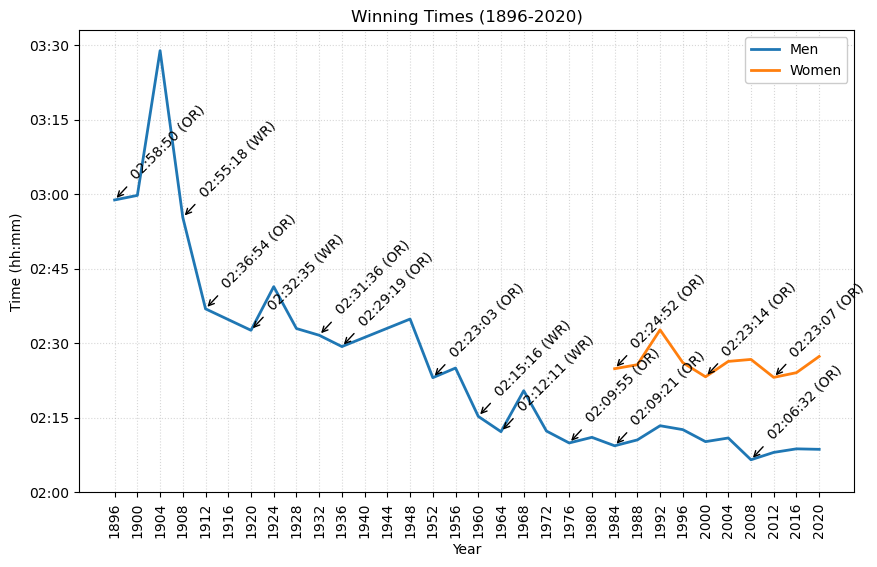

In [8]:
#### Plot of Winning Times from 1896 to 2020 ###

# Setting up plot style, size, grid type, axis labels and title
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Time (hh:mm)')
plt.title('Winning Times (1896-2020)')
plt.grid(True, alpha=0.5, linestyle=":")    

# Looping through genders
for gender in genders:
    # Getting data from winners_df for the stated gender
    gender_data = winners_df[winners_df['Gender'] == gender]
    # Plotting winning times for each year for each gender and linking points as line graph
    plt.plot(gender_data['Year'], gender_data['Time']/ pd.Timedelta(seconds=1), label=gender, linewidth=2) 

# Annotate years with "WR" or "OR" in the notes column
# Loop through each row of the records dataframe 
for index, row in records_df.iterrows():
    # Annotating with the time of each record in HH:MM:SS format followed by if it was an Olympic
    # or World Record in brackts
    # Annotations offset to the points with arrow showing where on the graph the record was set
    # to ensure that the annotations don't distract from the graph trends
    plt.annotate(f"{str(row['Time']).split(' ')[-1][:8]} ({row['Notes']})",
                 xy=(row['Year'], row['Time'] / pd.Timedelta(seconds=1)),
                 xytext=(10,15),
                 textcoords='offset points',
                 rotation=45,
                 arrowprops=dict(arrowstyle="->"))
    
# Setting x axis ticks to read vertically so they do not overlap and have a line every 4 years for each olympics
plt.xticks(rotation='vertical',ticks=range(winners_df['Year'].min(), winners_df['Year'].max() + 1, 4))

# Setting y axis tick positions in seconds with a 15 minute interval between each tick
tick_positions = range(120*60, (210*60)+60, 15*60)
plt.yticks(tick_positions)
# Passing through function to convert into HH:MM format
format_y_axis_times()

# Adding legend to plot
plt.legend(frameon=1, framealpha=1)

# Saving figure to figures file and showing plot
plt.savefig('figures/winning_times_plot.png', bbox_inches='tight')
plt.show()

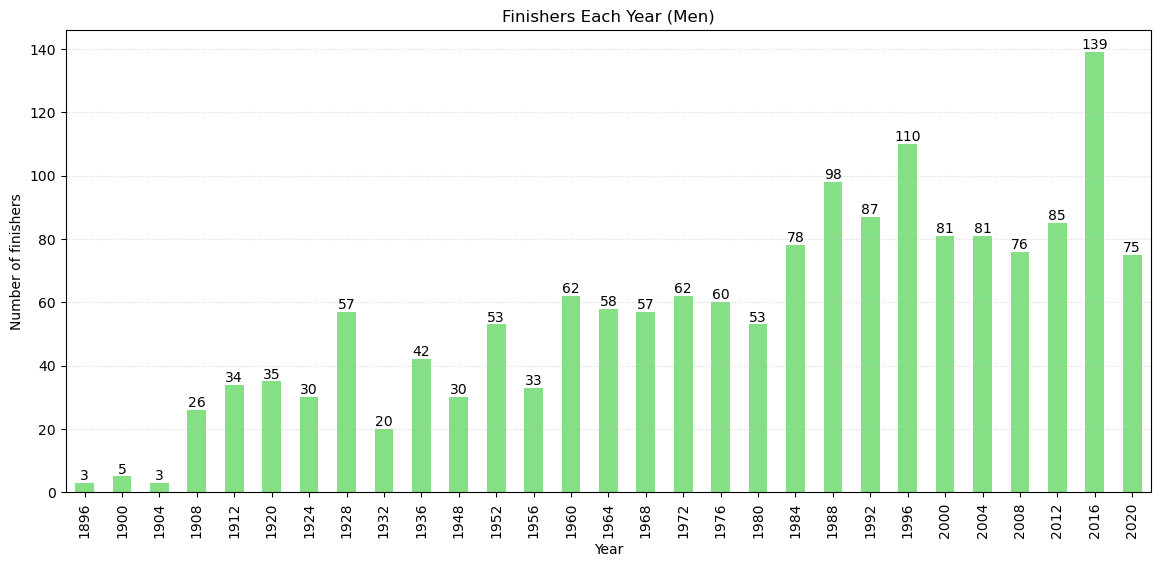

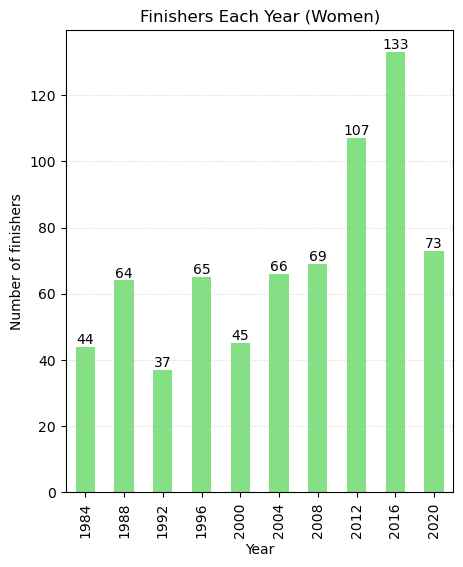

In [9]:
### Bar Graph of Total Finishers by Gender Each Year ###

# Looping through the genders to create plots
for gender in genders:
    
    # Setting plot style
    plt.style.use('default')
    
    # Filtering the master dataframe to only retrieve rows corresponding to the relavent gender
    # then grouping by the year and counting number of rows grouped into each year
    grouped_counts = df[df['Gender'] == gender].groupby('Year').size()
    
    # Calculating the number of bars to adjust plot size
    num_years = len(grouped_counts)
    
    # Calculating the figure width based on the number of bars and setting the figure size
    fig_width = (num_years // 2)  
    fig_height = 6
    plt.figure(figsize=(fig_width, fig_height))
    
    # Plotting the grouped counts as a bar graph in a light shade of green and bar width of 0.5
    ax = grouped_counts.plot(kind='bar', color=['#85e085'], width=0.5)

    # Annotating the top of each bar with its count value
    for i, count in enumerate(grouped_counts):
        ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    
    # Adding grid lines, axis labels and title to plot
    plt.grid(True, alpha=0.5, linestyle=":", axis='y')
    plt.xlabel('Year')
    plt.ylabel('Number of finishers')
    plt.title(f'Finishers Each Year ({gender})')     
    
    # Saving figure to figures file and showing plot
    plt.savefig(f'figures/total_finishers_{gender.lower()}_plot.png', bbox_inches='tight')
    plt.show()

<Figure size 1000x600 with 0 Axes>

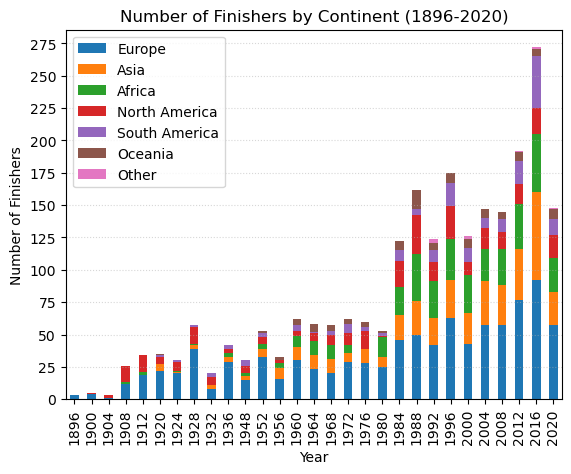

Total finishers by continent as a percentage of runners each year


Continent,Africa,Asia,Europe,North America,Oceania,Other,South America
Year,,,,,,,
1896,-,-,100%,-,-,-,-
1900,-,-,80%,20%,-,-,-
1904,-,-,33%,66%,-,-,-
1908,3%,-,46%,50%,-,-,-
1912,5%,-,55%,38%,-,-,-
1920,-,14%,62%,17%,2%,-,2%
1924,3%,3%,66%,23%,-,-,3%
1928,1%,5%,68%,22%,-,-,1%
1932,-,15%,40%,30%,-,-,15%


Total finishers by continent (number)


Continent,Africa,Asia,Europe,North America,Oceania,Other,South America
Year,,,,,,,
1896,-,-,3,-,-,-,-
1900,-,-,4,1,-,-,-
1904,-,-,1,2,-,-,-
1908,1,-,12,13,-,-,-
1912,2,-,19,13,-,-,-
1920,-,5,22,6,1,-,1
1924,1,1,20,7,-,-,1
1928,1,3,39,13,-,-,1
1932,-,3,8,6,-,-,3


"Other" continent in more detail


,Year,Location,Gender,Position,Name,Nationality,Time_Taken
920,1992,Barcelona,Men,22,Yakov Tolstikov,Unified Team,2:17:04
1741,1992,Barcelona,Women,1,Valentina Yegorova,Unified Team,2:32:41
1748,1992,Barcelona,Women,8,Ramilya Burangulova,Unified Team,2:38:46
1166,2000,Sydney,Men,71,Calisto da Costa,Individual Olympic Athletes,2:33:11
1885,2000,Sydney,Women,43,Aguida Amaral,Individual Olympic Athletes,3:10:55
1380,2012,London,Men,47,Guor Marial,Independent Olympic Athletes,2:19:32
1507,2016,Rio de Janeiro,Men,89,Yonas Kinde,Refugee Olympic Team,2:24:08
1573,2020,Tokyo,Men,16,Tachlowini Gabriyesos,Refugee Olympic Team,2:14:02


In [10]:
#### Plot of finishers each year separated out by the continent of the athlete ####

# Grouping master dataframe by 'Gender' and 'Continent' and counting occurrences
grouped_counts = df.groupby(['Year', 'Continent']).size().unstack()

# Converting all float values in the dataframe to integers
grouped_counts = grouped_counts.fillna(0).astype(int)

# Setting plot style and size
plt.style.use('default')
plt.figure(figsize=(10, 6))

## Sorting which continent stacks ontop of which
# Calculating the total counts for each continent
continent_totals = grouped_counts.sum()
# Sorting the columns by the total counts so continent with most counts at bottom
sorted_continents = continent_totals.sort_values(ascending=False).index
# Reorder the columns of grouped_counts dataframe
grouped_counts_sorted = grouped_counts[sorted_continents]

# Plotting the data as a stacked bar chart with different bar for each year 
# and different colour for each continent
ax = grouped_counts_sorted.plot.bar(stacked=True)

# Calculating the total number of finishers each year to format the y axis ticks
yearly_totals = grouped_counts.sum(axis=1)
# Adding y axis ticks and label
plt.yticks(np.arange(0, yearly_totals.max() + 5, 25))
plt.ylabel('Number of Finishers')

# Adding grid lines, x axis label, title and legend to the plot
plt.grid(True, alpha=0.5, linestyle=":", axis='y')
plt.xlabel('Year')
plt.title('Number of Finishers by Continent (1896-2020)')
plt.legend()  

# Saving figure to figures file and showing plot
plt.savefig('figures/total_finishers_by_continent_stacked_plot.png', bbox_inches='tight')
plt.show()


#### Tables behind the plot - absolute numbers and as percentages of finishers each year ####

## Working out the percentages talbes
# Dividing each count by the corresponding yearly total to get percentages
grouped_perc = grouped_counts.div(yearly_totals, axis=0) * 100
# Converting all float values in the dataframe to integers and adding percentage signs
grouped_perc = grouped_perc.fillna(0).astype(int).astype(str) + '%'

# Replacing '0%' values with '-' to make the table more readable
grouped_perc[grouped_perc == '0%'] = '-'

# Displaying and exporting table of pecentage of total finishers from each continent each year
print('Total finishers by continent as a percentage of runners each year')
display(grouped_perc)
export_df_as_markdown(grouped_perc.reset_index(), 'total_finishers_by_continent_percentage')

## Working on the absolute numbers table
# Replacing '0' with '-' to make the table more readable
grouped_counts[grouped_counts == 0] = '-'

# Displaying and exporting table of absolute numbers of finishers from each continent each year
print('Total finishers by continent (number)')
display(grouped_counts)
export_df_as_markdown(grouped_counts.reset_index(), 'total_finishers_by_continent_number')

## Exploring table of rows which have continent as 'Other' to 
## further understand who these athletes were competing for
# Filtering master dataframe by rows where the continent is 'Other'
other_continents = df[df['Continent']=='Other'][['Year', 'Location', 'Gender', 'Position', 'Name', 'Nationality', 'Time_Taken']].sort_values(by='Year')

# Displaying and exporting table of rows which have continent as 'Other'
print('"Other" continent in more detail')
display(other_continents)
export_df_as_markdown(other_continents, 'other_continent_finishers')


In [11]:
#### Tables for closest races, closest second places, top 10 runners ever ####

# Creating a medals dataframe from the master dataframe by filtering by Position
# then sorting by 'Year' and 'Position' to ensure chronological order
medals_df = df[df['Position'].isin([1, 2, 3])].sort_values(by=['Gender', 'Year','Position']).reset_index(drop=True)

# Creating column with the calculated time difference from the time in the row above 
medals_df['Time_Delta'] = medals_df['Time'].diff()
# Creating column with the calculatd difference converted to words using function defined earlier
medals_df['Difference'] = medals_df['Time_Delta'].apply(time_difference_to_words)

# Setting NaN for the first occurrence of each year as these were in 1st place so no difference to compute
medals_df.loc[medals_df['Position'] == 1, ['Time_Delta', 'Difference']] = None

# Displaying the medals dataframe
display(medals_df)

# Creating dataframe of all the athelets that came second
second_place_df = medals_df[medals_df['Position']==2].reset_index(drop=True)
# Creating dataframe of all the athelets that came third
third_place_df = medals_df[medals_df['Position']==3].reset_index(drop=True)
# Creating dataframe of all the athelets that did not win the races
not_first_place_df = medals_df[medals_df['Position']!=1].reset_index(drop=True)

# Looping through the genders to create the tables for each gender
for gender in genders:
    ## Closest and easiest wins
    # Filtering the second place dataframe by gender
    gender_second_place_df = second_place_df[second_place_df['Gender']==gender].sort_values(by='Time_Delta')
    # Creating a dataframe where the first three rows show the closest the second place has been to the first place
    # and the last three rows show the races where there has been the biggest gap between first and secons
    closest_and_easiest_races = pd.concat([gender_second_place_df.head(3), gender_second_place_df.tail(3)])
    closest_and_easiest_races = closest_and_easiest_races[['Year', 'Location', 'Gender','Position', 'Name', 'Nationality', 'Time_Taken', 'Difference']]
    # Renaming the difference column so the table is easier to interpret
    closest_and_easiest_races = closest_and_easiest_races.rename(columns={'Difference': 'Time behind 1st'})
    # Displaying and exporting the table
    print(f'{gender} closest and easiest wins')
    display(closest_and_easiest_races)
    export_df_as_markdown(closest_and_easiest_races, f'closest_and_easiest_races_{gender.lower()}')
    
    ## Closest and furthest apart 2nd and 3rd places
    # Filtering the third place dataframe by gender
    gender_third_place_df = third_place_df[third_place_df['Gender']==gender].sort_values(by='Time_Delta')
    # Creating a dataframe where the first three rows show the closest the third place has been to the second place
    # and the last three rows show the races where there has been the biggest gap between second and third
    closest_and_easiest_races = pd.concat([gender_third_place_df.head(3), gender_third_place_df.tail(3)])
    closest_and_easiest_races = closest_and_easiest_races[['Year', 'Location', 'Gender','Position', 'Name', 'Nationality', 'Time_Taken', 'Difference']]
    # Renaming the difference column so the table is easier to interpret
    closest_and_easiest_races = closest_and_easiest_races.rename(columns={'Difference': 'Time behind 2nd'})
    # Displaying and exporting the table
    print(f'{gender} closest and easiest 2nd places')
    display(closest_and_easiest_races)
    export_df_as_markdown(closest_and_easiest_races, f'closest_and_easiest_2nd_places_{gender.lower()}')
    
    ## All time top 10 finishes
    # Creating a dataframe from the master dataframe filtered by gender but sorting it by time 
    # so the fastest individuals will be at the top of the dataframe
    fastest_ever = df[df['Gender']==gender].sort_values(by='Time').reset_index(drop=True)
    # Creating a table of top 10 fastest times by taking the top 10 rows of the above dataframe
    top_10_fastest = fastest_ever.head(10)
    top_10_fastest = top_10_fastest[['Year', 'Location', 'Gender','Position', 'Name', 'Nationality', 'Time_Taken']]
    # Displaying and exporting the table
    print(f'{gender} fastest ever top 10')
    display(top_10_fastest)
    export_df_as_markdown(top_10_fastest, f'top_10_ever_{gender.lower()}')
    

,Year,Location,Gender,Position,Name,Nationality,Continent,Time_Taken,Notes,Time,Time_Delta,Difference
0,1896,Athens,Men,1,Spyridon Louis,Greece,Europe,2:58:50,OR,0 days 02:58:50,NaT,None
1,1896,Athens,Men,2,Charilaos Vasilakos,Greece,Europe,3:06:03,-,0 days 03:06:03,0 days 00:07:13,"7 minutes, 13 seconds, 0 hundredths of second"
2,1896,Athens,Men,3,Gyula Kellner,Hungary,Europe,3:06:35,-,0 days 03:06:35,0 days 00:00:32,"0 minutes, 32 seconds, 0 hundredths of second"
3,1900,Paris,Men,1,Michel Théato,France,Europe,2:59:45,-,0 days 02:59:45,NaT,None
4,1900,Paris,Men,2,Émile Champion,France,Europe,3:04:17,-,0 days 03:04:17,0 days 00:04:32,"4 minutes, 32 seconds, 0 hundredths of second"
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2016,Rio de Janeiro,Women,2,Eunice Kirwa,Bahrain,Asia,2:24:13,-,0 days 02:24:13,0 days 00:00:09,"0 minutes, 9 seconds, 0 hundredths of second"
113,2016,Rio de Janeiro,Women,3,Mare Dibaba,Ethiopia,Africa,2:24:30,-,0 days 02:24:30,0 days 00:00:17,"0 minutes, 17 seconds, 0 hundredths of second"
114,2020,Tokyo,Women,1,Peres Jepchirchir,Kenya,Africa,2:27:20,-,0 days 02:27:20,NaT,None
115,2020,Tokyo,Women,2,Brigid Kosgei,Kenya,Africa,2:27:36,-,0 days 02:27:36,0 days 00:00:16,"0 minutes, 16 seconds, 0 hundredths of second"


Men closest and easiest wins


,Year,Location,Gender,Position,Name,Nationality,Time_Taken,Time behind 1st
22,1996,Atlanta,Men,2,Lee Bong-ju,South Korea,2:12:39,"0 minutes, 3 seconds, 0 hundredths of second"
5,1920,Antwerp,Men,2,Jüri Lossmann,Estonia,2:32:48.6,"0 minutes, 12 seconds, 80 hundredths of second"
20,1988,Seoul,Men,2,Douglas Wakiihuri,Kenya,2:10:47,"0 minutes, 15 seconds, 0 hundredths of second"
6,1924,Paris,Men,2,Romeo Bertini,Italy,2:47:19.6,"5 minutes, 57 seconds, 0 hundredths of second"
2,1904,St. Louis,Men,2,Albert Corey,France,3:34:52,"5 minutes, 59 seconds, 0 hundredths of second"
0,1896,Athens,Men,2,Charilaos Vasilakos,Greece,3:06:03,"7 minutes, 13 seconds, 0 hundredths of second"


Men closest and easiest 2nd places


,Year,Location,Gender,Position,Name,Nationality,Time_Taken,Time behind 2nd
28,2020,Tokyo,Men,3,Bashir Abdi,Belgium,2:10:00,"0 minutes, 2 seconds, 0 hundredths of second"
19,1984,Los Angeles,Men,3,Charlie Spedding,Great Britain,2:09:58,"0 minutes, 2 seconds, 0 hundredths of second"
14,1964,Tokyo,Men,3,Kōkichi Tsuburaya,Japan,2:16:22.8,"0 minutes, 3 seconds, 60 hundredths of second"
5,1920,Antwerp,Men,3,Valerio Arri,Italy,2:36:32.8,"3 minutes, 44 seconds, 20 hundredths of second"
2,1904,St. Louis,Men,3,Arthur Newton,United States,3:47:33,"12 minutes, 41 seconds, 0 hundredths of second"
1,1900,Paris,Men,3,Ernst Fast,Sweden,3:37:14,"32 minutes, 57 seconds, 0 hundredths of second"


Men fastest ever top 10


,Year,Location,Gender,Position,Name,Nationality,Time_Taken
0,2008,Beijing,Men,1,Samuel Wanjiru,Kenya,2:06:32
1,2008,Beijing,Men,2,Jaouad Gharib,Morocco,2:07:16
2,2012,London,Men,1,Stephen Kiprotich,Uganda,2:08:01
3,2012,London,Men,2,Abel Kirui,Kenya,2:08:27
4,2020,Tokyo,Men,1,Eliud Kipchoge,Kenya,2:08:38
5,2016,Rio de Janeiro,Men,1,Eliud Kipchoge,Kenya,2:08:44
6,1984,Los Angeles,Men,1,Carlos Lopes,Portugal,2:09:21
7,2012,London,Men,3,Wilson Kipsang Kiprotich,Kenya,2:09:37
8,2016,Rio de Janeiro,Men,2,Feyisa Lilesa,Ethiopia,2:09:54
9,1976,Montreal,Men,1,Waldemar Cierpinski,East Germany,2:09:55


Women closest and easiest wins


,Year,Location,Gender,Position,Name,Nationality,Time_Taken,Time behind 1st
36,2012,London,Women,2,Priscah Jeptoo,Kenya,2:23:12,"0 minutes, 5 seconds, 0 hundredths of second"
31,1992,Barcelona,Women,2,Yuko Arimori,Japan,2:32:49,"0 minutes, 8 seconds, 0 hundredths of second"
33,2000,Sydney,Women,2,Lidia Șimon,Romania,2:23:22,"0 minutes, 8 seconds, 0 hundredths of second"
35,2008,Beijing,Women,2,Catherine Ndereba,Kenya,2:27:06,"0 minutes, 22 seconds, 0 hundredths of second"
29,1984,Los Angeles,Women,2,Grete Waitz,Norway,2:26:18,"1 minutes, 26 seconds, 0 hundredths of second"
32,1996,Atlanta,Women,2,Valentina Yegorova,Russia,2:28:05,"2 minutes, 0 seconds, 0 hundredths of second"


Women closest and easiest 2nd places


,Year,Location,Gender,Position,Name,Nationality,Time_Taken,Time behind 2nd
35,2008,Beijing,Women,3,Zhou Chunxiu,China,2:27:07,"0 minutes, 1 seconds, 0 hundredths of second"
38,2020,Tokyo,Women,3,Molly Seidel,United States,2:27:46,"0 minutes, 10 seconds, 0 hundredths of second"
36,2012,London,Women,3,Tatyana Petrova Arkhipova,Russia,2:23:29,"0 minutes, 17 seconds, 0 hundredths of second"
34,2004,Athens,Women,3,Deena Kastor,United States,2:27:20,"0 minutes, 48 seconds, 0 hundredths of second"
31,1992,Barcelona,Women,3,Lorraine Moller,New Zealand,2:33:59,"1 minutes, 10 seconds, 0 hundredths of second"
33,2000,Sydney,Women,3,Joyce Chepchumba,Kenya,2:24:45,"1 minutes, 23 seconds, 0 hundredths of second"


Women fastest ever top 10


,Year,Location,Gender,Position,Name,Nationality,Time_Taken
0,2012,London,Women,1,Tiki Gelana,Ethiopia,2:23:07
1,2012,London,Women,2,Priscah Jeptoo,Kenya,2:23:12
2,2000,Sydney,Women,1,Naoko Takahashi,Japan,2:23:14
3,2000,Sydney,Women,2,Lidia Șimon,Romania,2:23:22
4,2012,London,Women,3,Tatyana Petrova Arkhipova,Russia,2:23:29
5,2012,London,Women,4,Mary Jepkosgei Keitany,Kenya,2:23:56
6,2016,Rio de Janeiro,Women,1,Jemima Sumgong,Kenya,2:24:04
7,2016,Rio de Janeiro,Women,2,Eunice Kirwa,Bahrain,2:24:13
8,2016,Rio de Janeiro,Women,3,Mare Dibaba,Ethiopia,2:24:30
9,2012,London,Women,5,Tetyana Hamera-Shmyrko,Ukraine,2:24:32


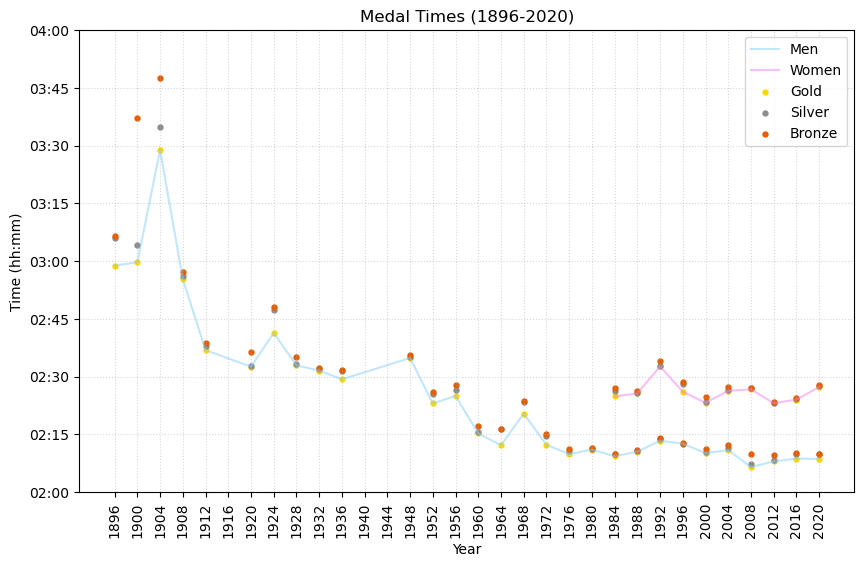

In [12]:
#### Medals plot of times of each medalist each year####

# Setting up the plot style, size, axis labels, title and grid lines
plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Time (hh:mm)')
plt.title('Medal Times (1896-2020)')
plt.grid(True, alpha=0.5, linestyle=":")

# Plotting a line graph of first positions times with a faded color
# Looping through genders
for gender in genders:
    # Creating a dataframe of the atheletes that came first for the relevant gender
    first_positions = medals_df[(medals_df['Position'] == 1)&(medals_df['Gender'] == gender)]
    # Setting different colour for each gender
    line_colour = 'lightskyblue' if gender == 'Men' else 'violet'
    # Converting the 'Time' column to total seconds and plotting data as a line graph
    plt.plot(first_positions['Year'], first_positions['Time'].dt.total_seconds(), color=line_colour, alpha=0.5, label=gender)

# Plot each medal finisher time
# Looping through the positions and corresponding medal colours (Gold, Silver and Bronze)
for position, color in [(1, '#ffd700'), (2, '#8c8c8c'), (3, '#e65c00')]:
    finishers = medals_df[medals_df['Position'] == position]
    # Plotting points as a scatter plot on the figure to be able to see on top of line graphs
    # points plotted from the 'Time' column being converted into seconds
    # labels added to each of the colour points to show in legend of graph
    plt.scatter(finishers['Year'], finishers['Time'].dt.total_seconds(), color=color, marker='.', alpha=1, s=50, label=f'{["Gold", "Silver", "Bronze"][position-1]}')
    
# Adding x axis ticks every 4 years from 1896 to 2020
plt.xticks(rotation='vertical',ticks=range(medals_df['Year'].min(), medals_df['Year'].max() + 1, 4))

# Adding y axis ticks that are in the HH:MM format every 15 minutes from 2 hours to 4 hours
tick_positions = range(120*60, (240*60)+60, 15*60)
plt.yticks(tick_positions)
format_y_axis_times()

# Adding legend to the plot
plt.legend()

# Saving figure to figures file and showing plot
plt.savefig('figures/medal_times_plot.png', bbox_inches='tight')
plt.show()

Merged table of average times


,Gender_Men,Time_Men,Gender_Women,Time_Women,Difference,Percentage_Difference
Year,,,,,,
1984,Men,0 days 02:24:06.858974358,Women,0 days 02:38:59.840909090,0 days 00:14:52.981934732,10.327241
1988,Men,0 days 02:29:55.153061224,Women,0 days 02:42:18.984375,0 days 00:12:23.831313776,8.269246
1992,Men,0 days 02:25:51.632183908,Women,0 days 02:49:18.729729729,0 days 00:23:27.097545821,16.078116
1996,Men,0 days 02:26:17.672727272,Women,0 days 02:41:41.830769230,0 days 00:15:24.158041958,10.528509
2000,Men,0 days 02:23:34.209876543,Women,0 days 02:37:10.311111111,0 days 00:13:36.101234568,9.473895
2004,Men,0 days 02:22:21.888888888,Women,0 days 02:45:29.045454545,0 days 00:23:07.156565657,16.239459
2008,Men,0 days 02:21:03.552631578,Women,0 days 02:36:09.144927536,0 days 00:15:05.592295958,10.699907
2012,Men,0 days 02:20:35.505882352,Women,0 days 02:36:08.336448598,0 days 00:15:32.830566246,11.058383
2016,Men,0 days 02:22:22.841726618,Women,0 days 02:43:34.443609022,0 days 00:21:11.601882404,14.884999


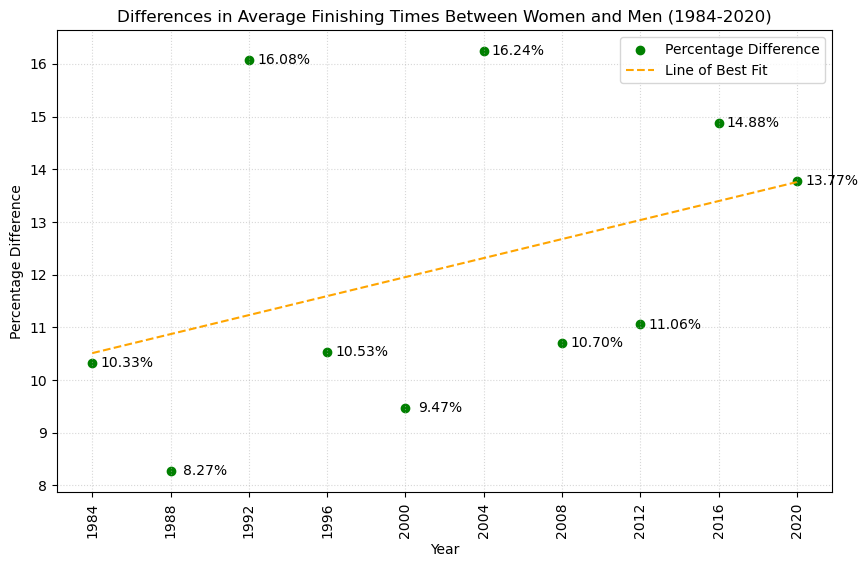

In [13]:
#### Differences between Average Men and Women finishers ####

# Creating a dataframe from the master dataframe which groups the data by gender and year 
# and calculates the average time of the finishers
men_and_women_averages = df[df['Year']>=1984].groupby(['Gender', 'Year'])['Time'].mean().reset_index()

# Creating two new dataframes from the averages dataframe one for each gender
men_averages = men_and_women_averages[men_and_women_averages['Gender'] == 'Men'].set_index('Year')
women_averages = men_and_women_averages[men_and_women_averages['Gender'] == 'Women'].set_index('Year')

# Merging the men and women dataframes on the 'Year' index so that for each year there is a column
# for the men average finishing time and a column for the women average finishing time
merged_averages = pd.merge(men_averages, women_averages, on='Year', suffixes=('_Men', '_Women'))

# Calculating the difference between the men and women average times
merged_averages['Difference'] = (merged_averages['Time_Women'] - merged_averages['Time_Men']) 
# Calculatint the percentage difference between men and women average times
merged_averages['Percentage_Difference'] = (merged_averages['Time_Women'] - merged_averages['Time_Men']) / merged_averages['Time_Men'] * 100

# Displaying the dataframe with the gender differences
print('Merged table of average times')
display(merged_averages)

# Setting the style and size of the plot
plt.style.use('default')
plt.figure(figsize=(10, 6))

# Plotting the Percentage Difference data points as a scatter plot
plt.scatter(merged_averages.index, merged_averages['Percentage_Difference'], label='Percentage Difference', marker='o', color='green')

# Adding annotations of the perecentage difference to each point on the graph
# the annotation have to be offset to not overlap with the plot points
for i, row in merged_averages.iterrows():
    plt.annotate(f"{row['Percentage_Difference']:.2f}%", 
                 (i, row['Percentage_Difference']),
                 textcoords="offset points",
                 xytext=(25,-3), 
                 ha='center')

# Fitting a linear regression line to add as a line of best fit using numpy
coefficients = np.polyfit(merged_averages.index, merged_averages['Percentage_Difference'], 1)
poly = np.poly1d(coefficients)
x_values = np.linspace(min(merged_averages.index), max(merged_averages.index), 100)
y_values = poly(x_values)

# Plotting a line of best fit from the linear regression
plt.plot(x_values, y_values, color='orange', linestyle='--', label='Line of Best Fit')

# Setting x axis ticks
plt.xticks(rotation='vertical',ticks=range(men_and_women_averages['Year'].min(), men_and_women_averages['Year'].max() + 1, 4))


# Adding grid lines, axis labels, title and legend to the plot
plt.grid(True, alpha=0.5, linestyle=":")
plt.xlabel('Year')
plt.ylabel('Percentage Difference')
plt.title('Differences in Average Finishing Times Between Women and Men (1984-2020)')
plt.legend()

# Saving figure to figures file and showing plot
plt.savefig('figures/gender_average_time_difference_plot.png', bbox_inches='tight')
plt.show()

In [14]:
#### Repeat Runners and how many people have run how many times ####

# Creating a dataframe from the master dataframe grouping the data by Name, Nationality and Gender
# counting the number of rows in each grouping and creating a list of the years the athlete finished
# marathon in to have as the final column
repeat_runners_df = df.groupby(['Name', 'Nationality', 'Gender']).agg({ 'Name': 'count', 'Year': list}).rename(columns={'Name': 'Number of Finishes'}).reset_index()

# Create a new dataframe to show the number of runners that have completed the marathon 1, 2, 3, 4 or 5 times
how_many_repeats_runners_df = repeat_runners_df.groupby(['Number of Finishes', 'Gender']).size().unstack()
# Filling the NaN with a 0 and converting the numbers from floats to integers to lose the .0
how_many_repeats_runners_df = how_many_repeats_runners_df.fillna(0).astype(int)

# Displaying and exporting the table
print('Number of times athletes have finshed')
display(how_many_repeats_runners_df.reset_index())
export_df_as_markdown(how_many_repeats_runners_df.reset_index(), f'number_of_times_athletes_have_finished')

# Creating a new data frame to look at runners that have completed the mararthon at least 4 times
repeat_runners_df = repeat_runners_df[repeat_runners_df['Number of Finishes']>3].sort_values(by=['Number of Finishes', 'Gender'], ascending=[False, True]).reset_index(drop=True)

# Displaying and exporting the table
print('Runners who have finished the Olympic Marathon at least 4 times')
display(repeat_runners_df)
export_df_as_markdown(repeat_runners_df, 'athletes_finshing_at_least_four_times')

Number of times athletes have finshed


Gender,Number of Finishes,Men,Women
0,1,1138,501
1,2,199,80
2,3,23,7
3,4,7,4
4,5,0,1


Runners who have finished the Olympic Marathon at least 4 times


,Name,Nationality,Gender,Number of Finishes,Year
0,Érika Olivera,Chile,Women,5,"[1996, 2000, 2004, 2012, 2016]"
1,Baikuntha Manandhar,Nepal,Men,4,"[1976, 1980, 1984, 1988]"
2,Hussein Ahmed Salah,Djibouti,Men,4,"[1984, 1988, 1992, 1996]"
3,José Amado García,Guatemala,Men,4,"[2004, 2008, 2012, 2016]"
4,Karel Lismont,Belgium,Men,4,"[1972, 1976, 1980, 1984]"
5,Pavel Loskutov,Estonia,Men,4,"[1996, 2000, 2004, 2008]"
6,Robert de Castella,Australia,Men,4,"[1980, 1984, 1988, 1992]"
7,Steve Moneghetti,Australia,Men,4,"[1988, 1992, 1996, 2000]"
8,Helalia Johannes,Namibia,Women,4,"[2008, 2012, 2016, 2020]"
9,Lidia Șimon,Romania,Women,4,"[1996, 2000, 2008, 2012]"


In [15]:
#### Medal Tally ####
# Creating a copy of medals_df with alternative name as don't want to change the medal_df master
medals_df_updated = medals_df
# Changing the positions from numbers to their respective medal colours
medals_df_updated['Position'] = medals_df['Position'].replace({1: 'Gold', 2: 'Silver', 3: 'Bronze'})

# Grouping medals dataframe by Nationality and Position and getting number of rows contained in each group
country_medal_count = medals_df_updated.groupby(['Nationality', 'Position']).size().unstack()
# Adding total medals column for each country
country_medal_count['Total Medals'] = country_medal_count.sum(axis=1)
# Filling any NaN values with 0 and converting to integer to get rid of .0 in table to make it more readable
country_medal_count = country_medal_count.sort_values(by='Total Medals', ascending=False).fillna(0).astype(int)

# Ordering the columns by the grade of the medal with total medals as final column
country_medal_count = country_medal_count.reindex(columns=['Gold', 'Silver', 'Bronze', 'Total Medals'], fill_value=0)
# Resetting the index so that Nationality column is included in the markdown format
country_medal_count = country_medal_count.reset_index()

# Displaying and exporting the table of medals tally by country replacing the 0's with '-' to make it more readable
print('Medals tally by country')
display(country_medal_count.replace(0,'-'))
export_df_as_markdown(country_medal_count.replace(0,'-'), 'country_medal_count')

# Creating a dataframe to show the top 5 countries to get the most gold medals
top_golds = country_medal_count.sort_values(by='Gold', ascending=False).head(5)

# Displaying and exporting the tables of the most gold medals collected by one country
display(top_golds)
export_df_as_markdown(top_golds, 'top_five_total_golds')

Medals tally by country


Position,Nationality,Gold,Silver,Bronze,Total Medals
0,Kenya,5,7,3,15
1,United States,4,2,7,13
2,Ethiopia,6,1,4,11
3,Japan,3,3,3,9
4,Finland,2,-,3,5
5,Great Britain,-,4,1,5
6,France,3,2,-,5
7,Belgium,-,1,3,4
8,Italy,2,1,1,4
9,South Africa,2,2,-,4


Position,Nationality,Gold,Silver,Bronze,Total Medals
2,Ethiopia,6,1,4,11
0,Kenya,5,7,3,15
1,United States,4,2,7,13
3,Japan,3,3,3,9
6,France,3,2,0,5


In [16]:
#### Repeat Medalists ####

# Creating a dataframe grouping the medals dataframe by Gender Name and Position and getting the number of rows contained in each group
name_medal_count = medals_df_updated.groupby(['Gender', 'Name', 'Position']).size().unstack()
# Adding total medals column for each athlete
name_medal_count['Total Medals'] = name_medal_count.sum(axis=1)
# Filtering dataframe for athletes who have won more than 1 medal
name_medal_count = name_medal_count[name_medal_count['Total Medals']>1].sort_values(by='Total Medals', ascending=False).fillna(0).astype(int)

# Ordering the columns by the grade of the medal with total medals as final column
name_medal_count = name_medal_count.reindex(columns=['Gold', 'Silver', 'Bronze', 'Total Medals'], fill_value=0)

# Displaying and exporting the table of medals tally by person replacing the 0's with '-' to make it more readable
print('Medal tally for athletes that have won more than one medal')
display(name_medal_count.replace(0,'-'))
export_df_as_markdown(name_medal_count.replace(0,'-').reset_index(), 'name_medal_count')


## Looking at which athlets ahve got more than 1 gold medals

# Creating a dataframe grouping the medals dataframe by Gender Name and Position
top_golds = medals_df_updated.groupby(['Gender', 'Name', 'Nationality', 'Position']).agg(
    Total_Medals=('Position', 'count'),  # Counting the number of medals for each athlete
    Years=('Year', list),
    Times=('Time_Taken', list)# Collate a list of years that each athlete has won medals
).reset_index()

# Filtering based on the 'Gold' column and the 'Total_Medals' column
top_golds = top_golds[(top_golds['Position'] == 'Gold') & (top_golds['Total_Medals'] > 1)].reset_index(drop=True)

# Displaying and exporting the table of athletes that have won gold more than once
print('Athletes that have won gold more than once')
display(top_golds)
export_df_as_markdown(top_golds, 'top_gold_medals')

Medal tally for athletes that have won more than one medal


Position                   Gold Silver Bronze  Total Medals
Gender Name                                                
Men    Abebe Bikila           2      -      -             2
       Eliud Kipchoge         2      -      -             2
       Erick Wainaina         -      1      1             2
       Frank Shorter          1      1      -             2
       Karel Lismont          -      1      1             2
       Mamo Wolde             1      -      1             2
       Waldemar Cierpinski    2      -      -             2
Women  Catherine Ndereba      -      2      -             2
       Rosa Mota              1      -      1             2
       Valentina Yegorova     1      1      -             2
       Yuko Arimori           -      1      1             2

Athletes that have won gold more than once


,Gender,Name,Nationality,Position,Total_Medals,Years,Times
0,Men,Abebe Bikila,Ethiopia,Gold,2,"[1960, 1964]","[2:15:16.2, 2:12:11.2]"
1,Men,Eliud Kipchoge,Kenya,Gold,2,"[2016, 2020]","[2:08:44, 2:08:38]"
2,Men,Waldemar Cierpinski,East Germany,Gold,2,"[1976, 1980]","[2:09:55, 2:11:03]"
